# Multiple Linear Regression

## Importing the libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [ ]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


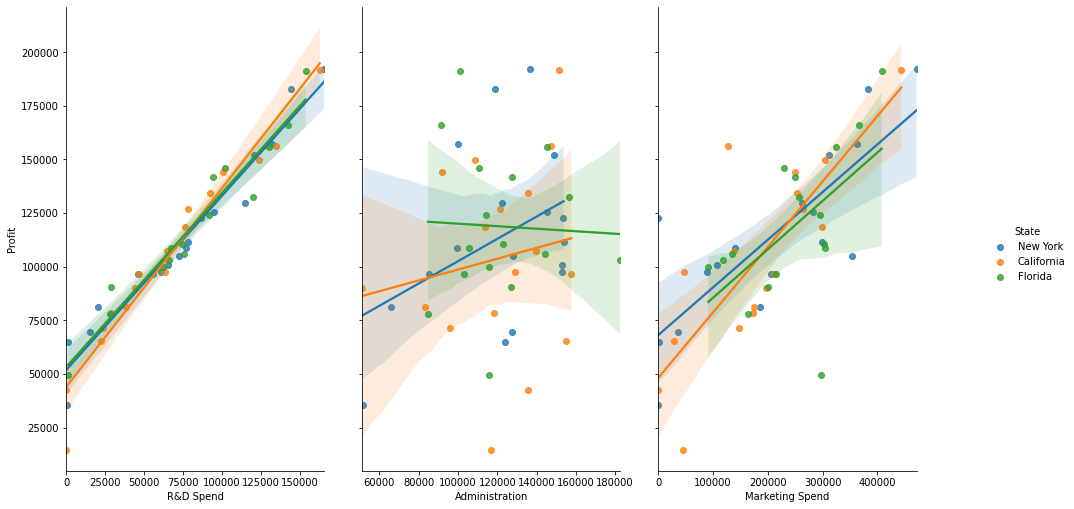

In [26]:
g = sns.pairplot(dataset, hue="State",y_vars="Profit",x_vars=['R&D Spend','Administration','Marketing Spend'],kind= "reg")  
g.fig.set_size_inches(15,8)
plt.show()

## Encoding categorical data

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[3])],remainder="passthrough")

In [ ]:
X = ct.fit_transform(X)

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


In [14]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [23]:
y_pred = regressor.predict(X_test)
print(np.stack([y_test,y_pred],axis =1))

[[103282.38       103015.20159795]
 [144259.4        132582.27760816]
 [146121.95       132447.73845175]
 [ 77798.83        71976.09851258]
 [191050.39       178537.48221057]
 [105008.31       116161.24230167]
 [ 81229.06        67851.69209676]
 [ 97483.56        98791.73374687]
 [110352.25       113969.43533014]
 [166187.94       167921.06569552]]
